In [ ]:
# Toronto real estate and COVID-19: Impact on population and housing trends in 2020
## Background

# As the COVID-19 pandemic continues, the housing market around Toronto has managed to remain robust during an unprecedented and unpredictable time.

# For homebuyers, it can be difficult to decide when the right time to buy a property given the uncertainty.

# Before the pandemic, housing trends were fueled by immigration, a robust job market and low interest rates on mortgages. 
# There has been a housing shortage in Toronto stretching back decades. 

# Yet, proprty prices remain high, even with uncertainty and higher unemployment. Soper told Daily Hive why property prices remain high, the key housing trends, and what first-time buyers should look for.

# Demand in Q4 2019 and Q1 202 were at record levels But then the pandemic came, and everything stopped - durnig the all important spring housing market.  Interest rates were set to historic lows by the Bank of Canada

# Money is now cheaper than it has ever been, inventory and the competition was low. Within six to eight weeks, home prices backed up

# Notably
# Canadian home sales hit all-time record in December 2020
# Toronto’s rental vacancy rate hits 50-year high
# Demand in urban centres remains high, despite movement to suburbs 


# Research shows Millenials prefer to own a condo in the city. And older generations want walkout properties, which tend to be farther away from the city core

# Advice
# Housing is not like stocks, it can be volatile but generally trends steadily up over time and has utility
# Mortgage rates are so low right now, , so it’s not a bad time to purchase a home.
#think long-term and not in reaction to the pandemic. 
#The notion that there is a mass migration to the suburbs is “overblown,” and w
#hen the pandemic is over in the near future, people will prefer the vibrancy and pace of urban living, with a subset wanting the slower pace of suburban living.
#look at their neighbourhoods with a post-pandemic eye. It’s a longer-term decision than the health crisis.”

#Projections

#as more people work from home and want more private space, there will be less open concept layouts. 
#“smart homes” with 5G network, and with people wanting higher and greater access to faster internet.
#demand for housing will continue to grow without a matching level of supply
#Canada is a desirable place to live and the GTA is the most desirable place to live in Canada


#The goal of this dashboard is to provide charts, maps, and interactive visualizations to explore real estate, COVID and population data to examine the impact of COVID on GTA Real Estate

## Packages Used

#* Plotly Express
#* Hvplot
#* Panel - Holoviz (For creating Dashboard)
#* Mapbox Token


## Files and APIs


In [ ]:
#imports apis and utils

import urllib, json, os, time
import dateutil.parser
from datetime import datetime, timedelta, timezone

In [3]:
#imports data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hvplot.pandas

In [4]:
#imports viz

import plotly.graph_objects as go
import plotly.express as px
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.io as pio

In [5]:
#import data
covid_data_url = 'https://data.ontario.ca/dataset/f4112442-bdc8-45d2-be3c-12efae72fb27/resource/455fd63b-603d-4608-8216-7d8647f43350/download/conposcovidloc.csv'  

covid_data = pd.read_csv(covid_data_url)
refreshtime = datetime.now()
cached=False

In [6]:
#create data frame
covid_df = pd.DataFrame(covid_data)
covid_df.head()

Row_ID Accurate_Episode_Date Case_Reported_Date  Test_Reported_Date  \
0       1            2020-03-16         2020-04-07                 NaN   
1       2            2020-03-29         2020-03-31                 NaN   
2       3            2020-04-04         2020-05-01                 NaN   
3       4            2020-03-17         2020-03-30                 NaN   
4       5            2020-05-07         2020-05-12                 NaN   

   Specimen_Date Age_Group Client_Gender Case_AcquisitionInfo  Outcome1  \
0            NaN       20s        FEMALE                   CC  Resolved   
1            NaN       60s          MALE    NO KNOWN EPI LINK  Resolved   
2            NaN       20s        FEMALE                   CC  Resolved   
3            NaN       60s        FEMALE                   CC  Resolved   
4            NaN       40s        FEMALE    NO KNOWN EPI LINK  Resolved   

  Outbreak_Related  Reporting_PHU_ID                    Reporting_PHU  \
0              NaN              2236  Halton Region Health Department   
1              NaN              2253               Peel Public Health   
2              NaN              2253               Peel Public Health   
3              NaN              2253               Peel Public Health   
4              NaN              2253               Peel Public Health   

    Reporting_PHU_Address Reporting_PHU_City Reporting_PHU_Postal_Code  \
0        1151 Bronte Road           Oakville                   L6M 3Ll   
1  7120 Hurontario Street        Mississauga                   L5W 1N4   
2  7120 Hurontario Street        Mississauga                   L5W 1N4   
3  7120 Hurontario Street        Mississauga                   L5W 1N4   
4  7120 Hurontario Street        Mississauga                   L5W 1N4   

                         Reporting_PHU_Website  Reporting_PHU_Latitude  \
0  www.halton.ca/For-Residents/Public-Health/                43.413997   
1                    www.peelregion.ca/health/               43.647471   
2                    www.peelregion.ca/health/               43.647471   
3                    www.peelregion.ca/health/               43.647471   
4                    www.peelregion.ca/health/               43.647471   

   Reporting_PHU_Longitude  
0               -79.744796  
1               -79.708893  
2               -79.708893  
3               -79.708893  
4               -79.708893

In [7]:
#clean data - get info
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276718 entries, 0 to 276717
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Row_ID                     276718 non-null  int64  
 1   Accurate_Episode_Date      276718 non-null  object 
 2   Case_Reported_Date         276718 non-null  object 
 3   Test_Reported_Date         0 non-null       float64
 4   Specimen_Date              0 non-null       float64
 5   Age_Group                  276674 non-null  object 
 6   Client_Gender              276718 non-null  object 
 7   Case_AcquisitionInfo       276718 non-null  object 
 8   Outcome1                   276718 non-null  object 
 9   Outbreak_Related           60850 non-null   object 
 10  Reporting_PHU_ID           276718 non-null  int64  
 11  Reporting_PHU              276718 non-null  object 
 12  Reporting_PHU_Address      276718 non-null  object 
 13  Reporting_PHU_City         27

In [8]:
# Filter the dataframe to only contain results in 7 GTA Cities, Accurate Episode Date, Reporting_PHU, Reporting_PHU_Latitude, Reporting_PHU_Longitude
to_drop = ['Test_Reported_Date',
           'Specimen_Date',
           'Age_Group',
           'Client_Gender',
           'Case_AcquisitionInfo',
           'Outcome1',
           'Outbreak_Related',
           'Reporting_PHU_ID',
           'Reporting_PHU',
           'Reporting_PHU_Address',
           'Reporting_PHU_Website']
covid_df.drop(to_drop, inplace=True, axis=1)
covid_df

Row_ID Accurate_Episode_Date Case_Reported_Date Reporting_PHU_City  \
0            1            2020-03-16         2020-04-07           Oakville   
1            2            2020-03-29         2020-03-31        Mississauga   
2            3            2020-04-04         2020-05-01        Mississauga   
3            4            2020-03-17         2020-03-30        Mississauga   
4            5            2020-05-07         2020-05-12        Mississauga   
...        ...                   ...                ...                ...   
276713  276714            2020-04-13         2020-04-15          Newmarket   
276714  276715            2020-11-11         2020-11-14            Toronto   
276715  276716            2021-01-23         2021-02-01           Hamilton   
276716  276717            2020-12-20         2020-12-28            Toronto   
276717  276718            2020-11-30         2020-12-09          Stratford   

       Reporting_PHU_Postal_Code  Reporting_PHU_Latitude  \
0                        L6M 3Ll               43.413997   
1                        L5W 1N4               43.647471   
2                        L5W 1N4               43.647471   
3                        L5W 1N4               43.647471   
4                        L5W 1N4               43.647471   
...                          ...                     ...   
276713                   L3Y 6Z1               44.048023   
276714                   M5B 1W2               43.656591   
276715                   L8P 4S6               43.257631   
276716                   M5B 1W2               43.656591   
276717                   N5A 1L4               43.368662   

        Reporting_PHU_Longitude  
0                    -79.744796  
1                    -79.708893  
2                    -79.708893  
3                    -79.708893  
4                    -79.708893  
...                         ...  
276713               -79.480239  
276714               -79.379358  
276715               -79.871341  
276716               -79.379358  
276717               -81.001913  

[276718 rows x 7 columns]

In [9]:
#create a row for cumluative cases (Cases)
covid_df.rename(columns={"Row_ID" : "Case"})

Case Accurate_Episode_Date Case_Reported_Date Reporting_PHU_City  \
0            1            2020-03-16         2020-04-07           Oakville   
1            2            2020-03-29         2020-03-31        Mississauga   
2            3            2020-04-04         2020-05-01        Mississauga   
3            4            2020-03-17         2020-03-30        Mississauga   
4            5            2020-05-07         2020-05-12        Mississauga   
...        ...                   ...                ...                ...   
276713  276714            2020-04-13         2020-04-15          Newmarket   
276714  276715            2020-11-11         2020-11-14            Toronto   
276715  276716            2021-01-23         2021-02-01           Hamilton   
276716  276717            2020-12-20         2020-12-28            Toronto   
276717  276718            2020-11-30         2020-12-09          Stratford   

       Reporting_PHU_Postal_Code  Reporting_PHU_Latitude  \
0                        L6M 3Ll               43.413997   
1                        L5W 1N4               43.647471   
2                        L5W 1N4               43.647471   
3                        L5W 1N4               43.647471   
4                        L5W 1N4               43.647471   
...                          ...                     ...   
276713                   L3Y 6Z1               44.048023   
276714                   M5B 1W2               43.656591   
276715                   L8P 4S6               43.257631   
276716                   M5B 1W2               43.656591   
276717                   N5A 1L4               43.368662   

        Reporting_PHU_Longitude  
0                    -79.744796  
1                    -79.708893  
2                    -79.708893  
3                    -79.708893  
4                    -79.708893  
...                         ...  
276713               -79.480239  
276714               -79.379358  
276715               -79.871341  
276716               -79.379358  
276717               -81.001913  

[276718 rows x 7 columns]

In [10]:
#create a column for each case
covid_df['case count'] = 1
covid_df

Row_ID Accurate_Episode_Date Case_Reported_Date Reporting_PHU_City  \
0            1            2020-03-16         2020-04-07           Oakville   
1            2            2020-03-29         2020-03-31        Mississauga   
2            3            2020-04-04         2020-05-01        Mississauga   
3            4            2020-03-17         2020-03-30        Mississauga   
4            5            2020-05-07         2020-05-12        Mississauga   
...        ...                   ...                ...                ...   
276713  276714            2020-04-13         2020-04-15          Newmarket   
276714  276715            2020-11-11         2020-11-14            Toronto   
276715  276716            2021-01-23         2021-02-01           Hamilton   
276716  276717            2020-12-20         2020-12-28            Toronto   
276717  276718            2020-11-30         2020-12-09          Stratford   

       Reporting_PHU_Postal_Code  Reporting_PHU_Latitude  \
0                        L6M 3Ll               43.413997   
1                        L5W 1N4               43.647471   
2                        L5W 1N4               43.647471   
3                        L5W 1N4               43.647471   
4                        L5W 1N4               43.647471   
...                          ...                     ...   
276713                   L3Y 6Z1               44.048023   
276714                   M5B 1W2               43.656591   
276715                   L8P 4S6               43.257631   
276716                   M5B 1W2               43.656591   
276717                   N5A 1L4               43.368662   

        Reporting_PHU_Longitude  case count  
0                    -79.744796           1  
1                    -79.708893           1  
2                    -79.708893           1  
3                    -79.708893           1  
4                    -79.708893           1  
...                         ...         ...  
276713               -79.480239           1  
276714               -79.379358           1  
276715               -79.871341           1  
276716               -79.379358           1  
276717               -81.001913           1  

[276718 rows x 8 columns]

In [11]:
#sum of cases by Date
covid_df_sum_by_date = covid_df.groupby(['Accurate_Episode_Date']).sum('case count')
covid_df_sum_by_date

Row_ID  Reporting_PHU_Latitude  \
Accurate_Episode_Date                                      
2020-01-01                560974              171.467323   
2020-01-02                208680               43.656591   
2020-01-03                236927               43.656591   
2020-01-05                235672               43.656591   
2020-01-09                145435               44.048023   
...                          ...                     ...   
2021-02-01             295285071            50196.515064   
2021-02-02             250407663            42622.870219   
2021-02-03             210092595            36274.671413   
2021-02-04             117296666            20366.031219   
2021-02-05               3508174              617.804385   

                       Reporting_PHU_Longitude  case count  
Accurate_Episode_Date                                       
2020-01-01                         -324.162213           4  
2020-01-02                          -79.379358           1  
2020-01-03                          -79.379358           1  
2020-01-05                          -79.379358           1  
2020-01-09                          -79.480239           1  
...                                        ...         ...  
2021-02-01                       -91230.003077        1147  
2021-02-02                       -77485.951365         974  
2021-02-03                       -65917.628675         829  
2021-02-04                       -36887.786088         465  
2021-02-05                        -1113.593998          14  

[380 rows x 4 columns]

In [12]:
#sum of cases by City
covid_df_sum_by_city = covid_df.groupby(['Reporting_PHU_City']).sum('case count')
covid_df_sum_by_city

Row_ID  Reporting_PHU_Latitude  \
Reporting_PHU_City                                        
Barrie                634384787            2.543402e+05   
Belleville             34157965            1.599558e+04   
Brantford             159677370            6.550445e+04   
Brockville             59870264            3.654038e+04   
Chatham               141334013            5.381050e+04   
Cornwall              288302019            1.136536e+05   
Guelph                491861239            1.909001e+05   
Hamilton             1065848880            4.111638e+05   
Kenora                 28788192            1.333826e+04   
Kingston               62305108            2.932308e+04   
London                722227340            2.506249e+05   
Mississauga          5665324289            2.453512e+06   
New Liskeard           10119438            4.275836e+03   
Newmarket            2715262244            1.152428e+06   
North Bay              21627089            9.031075e+03   
Oakville              882074511            3.650683e+05   
Ottawa               1402637644            6.156581e+05   
Owen Sound             65920236            2.919741e+04   
Pembroke               26674615            1.387722e+04   
Peterborough           59487085            2.463171e+04   
Point Edward          224769054            7.982578e+04   
Port Hope             100650754            4.001104e+04   
Sault Ste. Marie       21487297            8.189698e+03   
Simcoe                121556337            5.621635e+04   
St. Thomas            283241459            1.013406e+05   
Stratford             149731084            5.486136e+04   
Sudbury                60373320            2.485936e+04   
Thorold              1004850950            3.512704e+05   
Thunder Bay           124646766            4.980419e+04   
Timmins                35466703            1.415397e+04   
Toronto             18115417444            3.791051e+06   
Waterloo             1046091814            4.212857e+05   
Whitby               1131920158            4.815677e+05   
Windsor              1328476653            5.201020e+05   

                    Reporting_PHU_Longitude  case count  
Reporting_PHU_City                                       
Barrie                        -4.563635e+05        5727  
Belleville                    -2.801570e+04         362  
Brantford                     -1.218565e+05        1518  
Brockville                    -6.200062e+04         819  
Chatham                       -1.043227e+05        1269  
Cornwall                      -1.886344e+05        2524  
Guelph                        -3.519052e+05        4386  
Hamilton                      -7.591771e+05        9505  
Kenora                        -2.532285e+04         268  
Kingston                      -5.073621e+04         663  
London                        -4.737922e+05        5831  
Mississauga                   -4.480596e+06       56212  
New Liskeard                  -7.171347e+03          90  
Newmarket                     -2.079441e+06       26163  
North Bay                     -1.549623e+04         195  
Oakville                      -6.705740e+05        8409  
Ottawa                        -1.028647e+06       13577  
Owen Sound                    -5.301634e+04         655  
Pembroke                      -2.336697e+04         303  
Peterborough                  -4.354667e+04         556  
Point Edward                  -1.530257e+05        1857  
Port Hope                     -7.124007e+04         910  
Sault Ste. Marie              -1.483941e+04         176  
Simcoe                        -1.053586e+05        1312  
St. Thomas                    -1.922471e+05        2369  
Stratford                     -1.024674e+05        1265  
Sudbury                       -4.333396e+04         535  
Thorold                       -6.455782e+05        8147  
Thunder Bay                   -9.184736e+04        1029  
Timmins                       -2.374800e+04         292  
Toronto                       -6.893145e+06 

In [13]:
#sum of cases by City and date
covid_df_sum_by_date_by_city = covid_df.groupby(['Accurate_Episode_Date','Reporting_PHU_City']).sum('case count')
covid_df_sum_by_date_by_city

Row_ID  Reporting_PHU_Latitude  \
Accurate_Episode_Date Reporting_PHU_City                                   
2020-01-01            Simcoe              273970               85.695651   
                      Waterloo             13299               43.462876   
                      Windsor             273705               42.308796   
2020-01-02            Toronto             208680               43.656591   
2020-01-03            Toronto             236927               43.656591   
...                                          ...                     ...   
2021-02-05            Ottawa              249857               45.345665   
                      St. Thomas          251138               42.777804   
                      Timmins             252050               48.472510   
                      Toronto             749079              130.969774   
                      Whitby              251140               43.898605   

                                          Reporting_PHU_Longitude  case count  
Accurate_Episode_Date Reporting_PHU_City                                       
2020-01-01            Simcoe                          -160.607630           2  
                      Waterloo                         -80.520913           1  
                      Windsor                          -83.033670           1  
2020-01-02            Toronto                          -79.379358           1  
2020-01-03            Toronto                          -79.379358           1  
...                                                           ...         ...  
2021-02-05            Ottawa                           -75.763912           1  
                      St. Thomas                       -81.151156           1  
                      Timmins                          -81.328750           1  
                      Toronto                         -238.138074           3  
                      Whitby                           -78.940341           1  

[7996 rows x 4 columns]

<AxesSubplot:title={'center':'Case Count by Date - All cases'}, xlabel='Accurate_Episode_Date'>

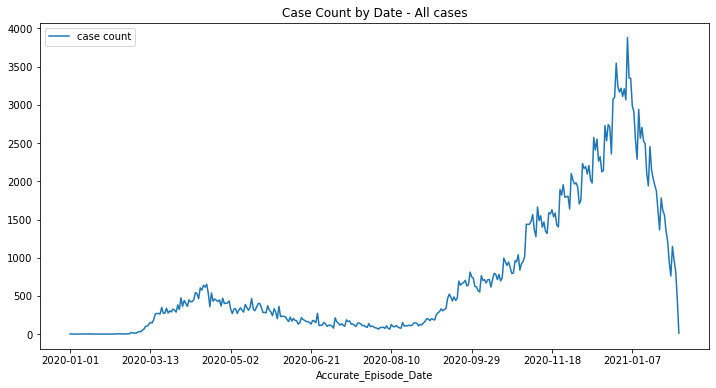

In [14]:
#total cases
covid_df_sum_by_date.plot(y = ['case count'], figsize = (12,6), title = "Case Count by Date - All cases")

<AxesSubplot:title={'center':'Case Count by City - All cases'}, xlabel='Reporting_PHU_City'>

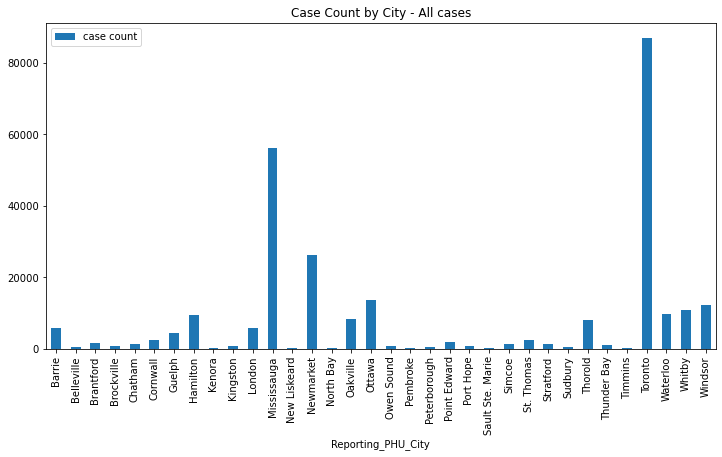

In [15]:
#total by city
covid_df_sum_by_city.plot(kind = 'bar', y = ['case count'], figsize = (12,6), title = "Case Count by City - All cases")

In [16]:
#cases by date toronto
toronto_covid_df = covid_df.loc[covid_df['Reporting_PHU_City'] == 'Toronto']
toronto_covid_df

Row_ID Accurate_Episode_Date Case_Reported_Date Reporting_PHU_City  \
255        256            2020-04-10         2020-04-17            Toronto   
272        273            2020-04-28         2020-05-03            Toronto   
282        283            2020-03-24         2020-03-25            Toronto   
338        339            2020-04-02         2020-04-06            Toronto   
603        604            2020-04-30         2020-04-26            Toronto   
...        ...                   ...                ...                ...   
276710  276711            2021-01-29         2021-01-31            Toronto   
276711  276712            2021-01-31         2021-02-01            Toronto   
276712  276713            2021-01-20         2021-01-21            Toronto   
276714  276715            2020-11-11         2020-11-14            Toronto   
276716  276717            2020-12-20         2020-12-28            Toronto   

       Reporting_PHU_Postal_Code  Reporting_PHU_Latitude  \
255                      M5B 1W2               43.656591   
272                      M5B 1W2               43.656591   
282                      M5B 1W2               43.656591   
338                      M5B 1W2               43.656591   
603                      M5B 1W2               43.656591   
...                          ...                     ...   
276710                   M5B 1W2               43.656591   
276711                   M5B 1W2               43.656591   
276712                   M5B 1W2               43.656591   
276714                   M5B 1W2               43.656591   
276716                   M5B 1W2               43.656591   

        Reporting_PHU_Longitude  case count  
255                  -79.379358           1  
272                  -79.379358           1  
282                  -79.379358           1  
338                  -79.379358           1  
603                  -79.379358           1  
...                         ...         ...  
276710               -79.379358           1  
276711               -79.379358           1  
276712               -79.379358           1  
276714               -79.379358           1  
276716               -79.379358           1  

[86838 rows x 8 columns]

In [17]:
#cases by date Mississauga
Mississauga_covid_df = covid_df.loc[covid_df['Reporting_PHU_City'] == 'Mississauga']
Mississauga_covid_df

Row_ID Accurate_Episode_Date Case_Reported_Date Reporting_PHU_City  \
1            2            2020-03-29         2020-03-31        Mississauga   
2            3            2020-04-04         2020-05-01        Mississauga   
3            4            2020-03-17         2020-03-30        Mississauga   
4            5            2020-05-07         2020-05-12        Mississauga   
5            6            2020-04-19         2020-04-22        Mississauga   
...        ...                   ...                ...                ...   
276681  276682            2020-12-13         2020-12-17        Mississauga   
276685  276686            2021-01-27         2021-01-30        Mississauga   
276690  276691            2020-12-15         2020-12-22        Mississauga   
276692  276693            2020-12-18         2020-12-22        Mississauga   
276704  276705            2020-12-14         2020-12-18        Mississauga   

       Reporting_PHU_Postal_Code  Reporting_PHU_Latitude  \
1                        L5W 1N4               43.647471   
2                        L5W 1N4               43.647471   
3                        L5W 1N4               43.647471   
4                        L5W 1N4               43.647471   
5                        L5W 1N4               43.647471   
...                          ...                     ...   
276681                   L5W 1N4               43.647471   
276685                   L5W 1N4               43.647471   
276690                   L5W 1N4               43.647471   
276692                   L5W 1N4               43.647471   
276704                   L5W 1N4               43.647471   

        Reporting_PHU_Longitude  case count  
1                    -79.708893           1  
2                    -79.708893           1  
3                    -79.708893           1  
4                    -79.708893           1  
5                    -79.708893           1  
...                         ...         ...  
276681               -79.708893           1  
276685               -79.708893           1  
276690               -79.708893           1  
276692               -79.708893           1  
276704               -79.708893           1  

[56212 rows x 8 columns]

In [18]:
#cases by date Guelph
Guelph_covid_df = covid_df.loc[covid_df['Reporting_PHU_City'] == 'Guelph']
Guelph_covid_df

Row_ID Accurate_Episode_Date Case_Reported_Date Reporting_PHU_City  \
220        221            2020-04-30         2020-05-01             Guelph   
1591      1592            2020-03-28         2020-04-12             Guelph   
2683      2684            2020-04-01         2020-04-04             Guelph   
3388      3389            2020-05-04         2020-05-15             Guelph   
4114      4115            2020-04-27         2020-05-01             Guelph   
...        ...                   ...                ...                ...   
276441  276442            2020-12-02         2020-12-04             Guelph   
276451  276452            2020-11-23         2020-12-07             Guelph   
276469  276470            2021-01-20         2021-01-22             Guelph   
276587  276588            2021-01-20         2021-01-26             Guelph   
276590  276591            2021-01-01         2021-01-03             Guelph   

       Reporting_PHU_Postal_Code  Reporting_PHU_Latitude  \
220                      N1G 0E1               43.524881   
1591                     N1G 0E1               43.524881   
2683                     N1G 0E1               43.524881   
3388                     N1G 0E1               43.524881   
4114                     N1G 0E1               43.524881   
...                          ...                     ...   
276441                   N1G 0E1               43.524881   
276451                   N1G 0E1               43.524881   
276469                   N1G 0E1               43.524881   
276587                   N1G 0E1               43.524881   
276590                   N1G 0E1               43.524881   

        Reporting_PHU_Longitude  case count  
220                  -80.233743           1  
1591                 -80.233743           1  
2683                 -80.233743           1  
3388                 -80.233743           1  
4114                 -80.233743           1  
...                         ...         ...  
276441               -80.233743           1  
276451               -80.233743           1  
276469               -80.233743           1  
276587               -80.233743           1  
276590               -80.233743           1  

[4386 rows x 8 columns]

In [19]:
#cases by date Hamilton
Hamilton_covid_df = covid_df.loc[covid_df['Reporting_PHU_City'] == 'Hamilton']
Hamilton_covid_df

Row_ID Accurate_Episode_Date Case_Reported_Date Reporting_PHU_City  \
637        638            2020-04-07         2020-04-15           Hamilton   
5093      5094            2020-05-25         2020-05-27           Hamilton   
6329      6330            2020-07-16         2020-07-19           Hamilton   
10382    10383            2020-06-06         2020-06-13           Hamilton   
11688    11689            2020-05-02         2020-05-05           Hamilton   
...        ...                   ...                ...                ...   
276533  276534            2020-11-06         2020-11-08           Hamilton   
276539  276540            2020-11-21         2020-11-23           Hamilton   
276542  276543            2021-01-25         2021-01-25           Hamilton   
276573  276574            2021-01-21         2021-01-22           Hamilton   
276715  276716            2021-01-23         2021-02-01           Hamilton   

       Reporting_PHU_Postal_Code  Reporting_PHU_Latitude  \
637                      L8P 4S6               43.257631   
5093                     L8P 4S6               43.257631   
6329                     L8P 4S6               43.257631   
10382                    L8P 4S6               43.257631   
11688                    L8P 4S6               43.257631   
...                          ...                     ...   
276533                   L8P 4S6               43.257631   
276539                   L8P 4S6               43.257631   
276542                   L8P 4S6               43.257631   
276573                   L8P 4S6               43.257631   
276715                   L8P 4S6               43.257631   

        Reporting_PHU_Longitude  case count  
637                  -79.871341           1  
5093                 -79.871341           1  
6329                 -79.871341           1  
10382                -79.871341           1  
11688                -79.871341           1  
...                         ...         ...  
276533               -79.871341           1  
276539               -79.871341           1  
276542               -79.871341           1  
276573               -79.871341           1  
276715               -79.871341           1  

[9505 rows x 8 columns]

In [20]:
#cases by date toronto
Oakville_covid_df = covid_df.loc[covid_df['Reporting_PHU_City'] == 'Oakville']
Oakville_covid_df

Row_ID Accurate_Episode_Date Case_Reported_Date Reporting_PHU_City  \
0            1            2020-03-16         2020-04-07           Oakville   
22          23            2020-05-19         2020-05-21           Oakville   
39          40            2020-05-11         2020-05-15           Oakville   
40          41            2020-03-28         2020-04-03           Oakville   
41          42            2020-03-31         2020-04-25           Oakville   
...        ...                   ...                ...                ...   
276353  276354            2021-01-03         2021-01-06           Oakville   
276412  276413            2020-11-20         2020-11-23           Oakville   
276467  276468            2020-11-01         2020-11-05           Oakville   
276592  276593            2021-01-19         2021-01-23           Oakville   
276666  276667            2021-01-21         2021-01-22           Oakville   

       Reporting_PHU_Postal_Code  Reporting_PHU_Latitude  \
0                        L6M 3Ll               43.413997   
22                       L6M 3Ll               43.413997   
39                       L6M 3Ll               43.413997   
40                       L6M 3Ll               43.413997   
41                       L6M 3Ll               43.413997   
...                          ...                     ...   
276353                   L6M 3Ll               43.413997   
276412                   L6M 3Ll               43.413997   
276467                   L6M 3Ll               43.413997   
276592                   L6M 3Ll               43.413997   
276666                   L6M 3Ll               43.413997   

        Reporting_PHU_Longitude  case count  
0                    -79.744796           1  
22                   -79.744796           1  
39                   -79.744796           1  
40                   -79.744796           1  
41                   -79.744796           1  
...                         ...         ...  
276353               -79.744796           1  
276412               -79.744796           1  
276467               -79.744796           1  
276592               -79.744796           1  
276666               -79.744796           1  

[8409 rows x 8 columns]

In [21]:
#cases by date toronto
Waterloo_covid_df = covid_df.loc[covid_df['Reporting_PHU_City'] == 'Waterloo']
Waterloo_covid_df

Row_ID Accurate_Episode_Date Case_Reported_Date Reporting_PHU_City  \
2509      2510            2020-04-01         2020-04-03           Waterloo   
3662      3663            2020-04-16         2020-04-28           Waterloo   
7589      7590            2020-03-20         2020-03-31           Waterloo   
8328      8329            2020-04-04         2020-04-04           Waterloo   
8666      8667            2020-03-26         2020-04-01           Waterloo   
...        ...                   ...                ...                ...   
276624  276625            2021-01-04         2021-01-08           Waterloo   
276652  276653            2020-03-29         2020-03-31           Waterloo   
276661  276662            2021-01-21         2021-01-22           Waterloo   
276669  276670            2020-12-31         2021-01-02           Waterloo   
276678  276679            2020-12-13         2020-12-17           Waterloo   

       Reporting_PHU_Postal_Code  Reporting_PHU_Latitude  \
2509                     N2J 4V3               43.462876   
3662                     N2J 4V3               43.462876   
7589                     N2J 4V3               43.462876   
8328                     N2J 4V3               43.462876   
8666                     N2J 4V3               43.462876   
...                          ...                     ...   
276624                   N2J 4V3               43.462876   
276652                   N2J 4V3               43.462876   
276661                   N2J 4V3               43.462876   
276669                   N2J 4V3               43.462876   
276678                   N2J 4V3               43.462876   

        Reporting_PHU_Longitude  case count  
2509                 -80.520913           1  
3662                 -80.520913           1  
7589                 -80.520913           1  
8328                 -80.520913           1  
8666                 -80.520913           1  
...                         ...         ...  
276624               -80.520913           1  
276652               -80.520913           1  
276661               -80.520913           1  
276669               -80.520913           1  
276678               -80.520913           1  

[9693 rows x 8 columns]

In [22]:
toronto  = covid_df.loc[covid_df['Reporting_PHU_City'] == 'Toronto'].sum()
toronto

Row_ID                                                             18115417444
Accurate_Episode_Date        2020-04-102020-04-282020-03-242020-04-022020-0...
Case_Reported_Date           2020-04-172020-05-032020-03-252020-04-062020-0...
Reporting_PHU_City           TorontoTorontoTorontoTorontoTorontoTorontoToro...
Reporting_PHU_Postal_Code    M5B 1W2M5B 1W2M5B 1W2M5B 1W2M5B 1W2M5B 1W2M5B ...
Reporting_PHU_Latitude                                             3.79105e+06
Reporting_PHU_Longitude                                           -6.89314e+06
case count                                                               86838
dtype: object

In [23]:
Mississauga  = covid_df.loc[covid_df['Reporting_PHU_City'] == 'Mississauga'].sum()
Mississauga

Row_ID                                                              5665324289
Accurate_Episode_Date        2020-03-292020-04-042020-03-172020-05-072020-0...
Case_Reported_Date           2020-03-312020-05-012020-03-302020-05-122020-0...
Reporting_PHU_City           MississaugaMississaugaMississaugaMississaugaMi...
Reporting_PHU_Postal_Code    L5W 1N4L5W 1N4L5W 1N4L5W 1N4L5W 1N4L5W 1N4L5W ...
Reporting_PHU_Latitude                                             2.45351e+06
Reporting_PHU_Longitude                                            -4.4806e+06
case count                                                               56212
dtype: object

In [24]:
Hamilton  = covid_df.loc[covid_df['Reporting_PHU_City'] == 'Hamilton'].sum()
Hamilton

Row_ID                                                              1065848880
Accurate_Episode_Date        2020-04-072020-05-252020-07-162020-06-062020-0...
Case_Reported_Date           2020-04-152020-05-272020-07-192020-06-132020-0...
Reporting_PHU_City           HamiltonHamiltonHamiltonHamiltonHamiltonHamilt...
Reporting_PHU_Postal_Code    L8P 4S6L8P 4S6L8P 4S6L8P 4S6L8P 4S6L8P 4S6L8P ...
Reporting_PHU_Latitude                                                  411164
Reporting_PHU_Longitude                                                -759177
case count                                                                9505
dtype: object

In [25]:
Guelph  = covid_df.loc[covid_df['Reporting_PHU_City'] == 'Guelph'].sum()
Guelph

Row_ID                                                               491861239
Accurate_Episode_Date        2020-04-302020-03-282020-04-012020-05-042020-0...
Case_Reported_Date           2020-05-012020-04-122020-04-042020-05-152020-0...
Reporting_PHU_City           GuelphGuelphGuelphGuelphGuelphGuelphGuelphGuel...
Reporting_PHU_Postal_Code    N1G 0E1N1G 0E1N1G 0E1N1G 0E1N1G 0E1N1G 0E1N1G ...
Reporting_PHU_Latitude                                                  190900
Reporting_PHU_Longitude                                                -351905
case count                                                                4386
dtype: object

In [26]:
Oakville  = covid_df.loc[covid_df['Reporting_PHU_City'] == 'Oakville'].sum()
Oakville

Row_ID                                                               882074511
Accurate_Episode_Date        2020-03-162020-05-192020-05-112020-03-282020-0...
Case_Reported_Date           2020-04-072020-05-212020-05-152020-04-032020-0...
Reporting_PHU_City           OakvilleOakvilleOakvilleOakvilleOakvilleOakvil...
Reporting_PHU_Postal_Code    L6M 3LlL6M 3LlL6M 3LlL6M 3LlL6M 3LlL6M 3LlL6M ...
Reporting_PHU_Latitude                                                  365068
Reporting_PHU_Longitude                                                -670574
case count                                                                8409
dtype: object

In [27]:
Waterloo  = covid_df.loc[covid_df['Reporting_PHU_City'] == 'Waterloo'].sum()
Waterloo

Row_ID                                                              1046091814
Accurate_Episode_Date        2020-04-012020-04-162020-03-202020-04-042020-0...
Case_Reported_Date           2020-04-032020-04-282020-03-312020-04-042020-0...
Reporting_PHU_City           WaterlooWaterlooWaterlooWaterlooWaterlooWaterl...
Reporting_PHU_Postal_Code    N2J 4V3N2J 4V3N2J 4V3N2J 4V3N2J 4V3N2J 4V3N2J ...
Reporting_PHU_Latitude                                                  421286
Reporting_PHU_Longitude                                                -780489
case count                                                                9693
dtype: object

In [28]:
covid_df_sum_by_date_by_city

Row_ID  Reporting_PHU_Latitude  \
Accurate_Episode_Date Reporting_PHU_City                                   
2020-01-01            Simcoe              273970               85.695651   
                      Waterloo             13299               43.462876   
                      Windsor             273705               42.308796   
2020-01-02            Toronto             208680               43.656591   
2020-01-03            Toronto             236927               43.656591   
...                                          ...                     ...   
2021-02-05            Ottawa              249857               45.345665   
                      St. Thomas          251138               42.777804   
                      Timmins             252050               48.472510   
                      Toronto             749079              130.969774   
                      Whitby              251140               43.898605   

                                          Reporting_PHU_Longitude  case count  
Accurate_Episode_Date Reporting_PHU_City                                       
2020-01-01            Simcoe                          -160.607630           2  
                      Waterloo                         -80.520913           1  
                      Windsor                          -83.033670           1  
2020-01-02            Toronto                          -79.379358           1  
2020-01-03            Toronto                          -79.379358           1  
...                                                           ...         ...  
2021-02-05            Ottawa                           -75.763912           1  
                      St. Thomas                       -81.151156           1  
                      Timmins                          -81.328750           1  
                      Toronto                         -238.138074           3  
                      Whitby                           -78.940341           1  

[7996 rows x 4 columns]

In [29]:
covid_city_pivot = pd.pivot_table(covid_df_sum_by_date_by_city, 
                       values='case count', 
                       index=['Accurate_Episode_Date','Reporting_PHU_City' ],
                        dropna = True,
                       aggfunc=np.sum)
covid_city_pivot

case count
Accurate_Episode_Date Reporting_PHU_City            
2020-01-01            Simcoe                       2
                      Waterloo                     1
                      Windsor                      1
2020-01-02            Toronto                      1
2020-01-03            Toronto                      1
...                                              ...
2021-02-05            Ottawa                       1
                      St. Thomas                   1
                      Timmins                      1
                      Toronto                      3
                      Whitby                       1

[7996 rows x 1 columns]

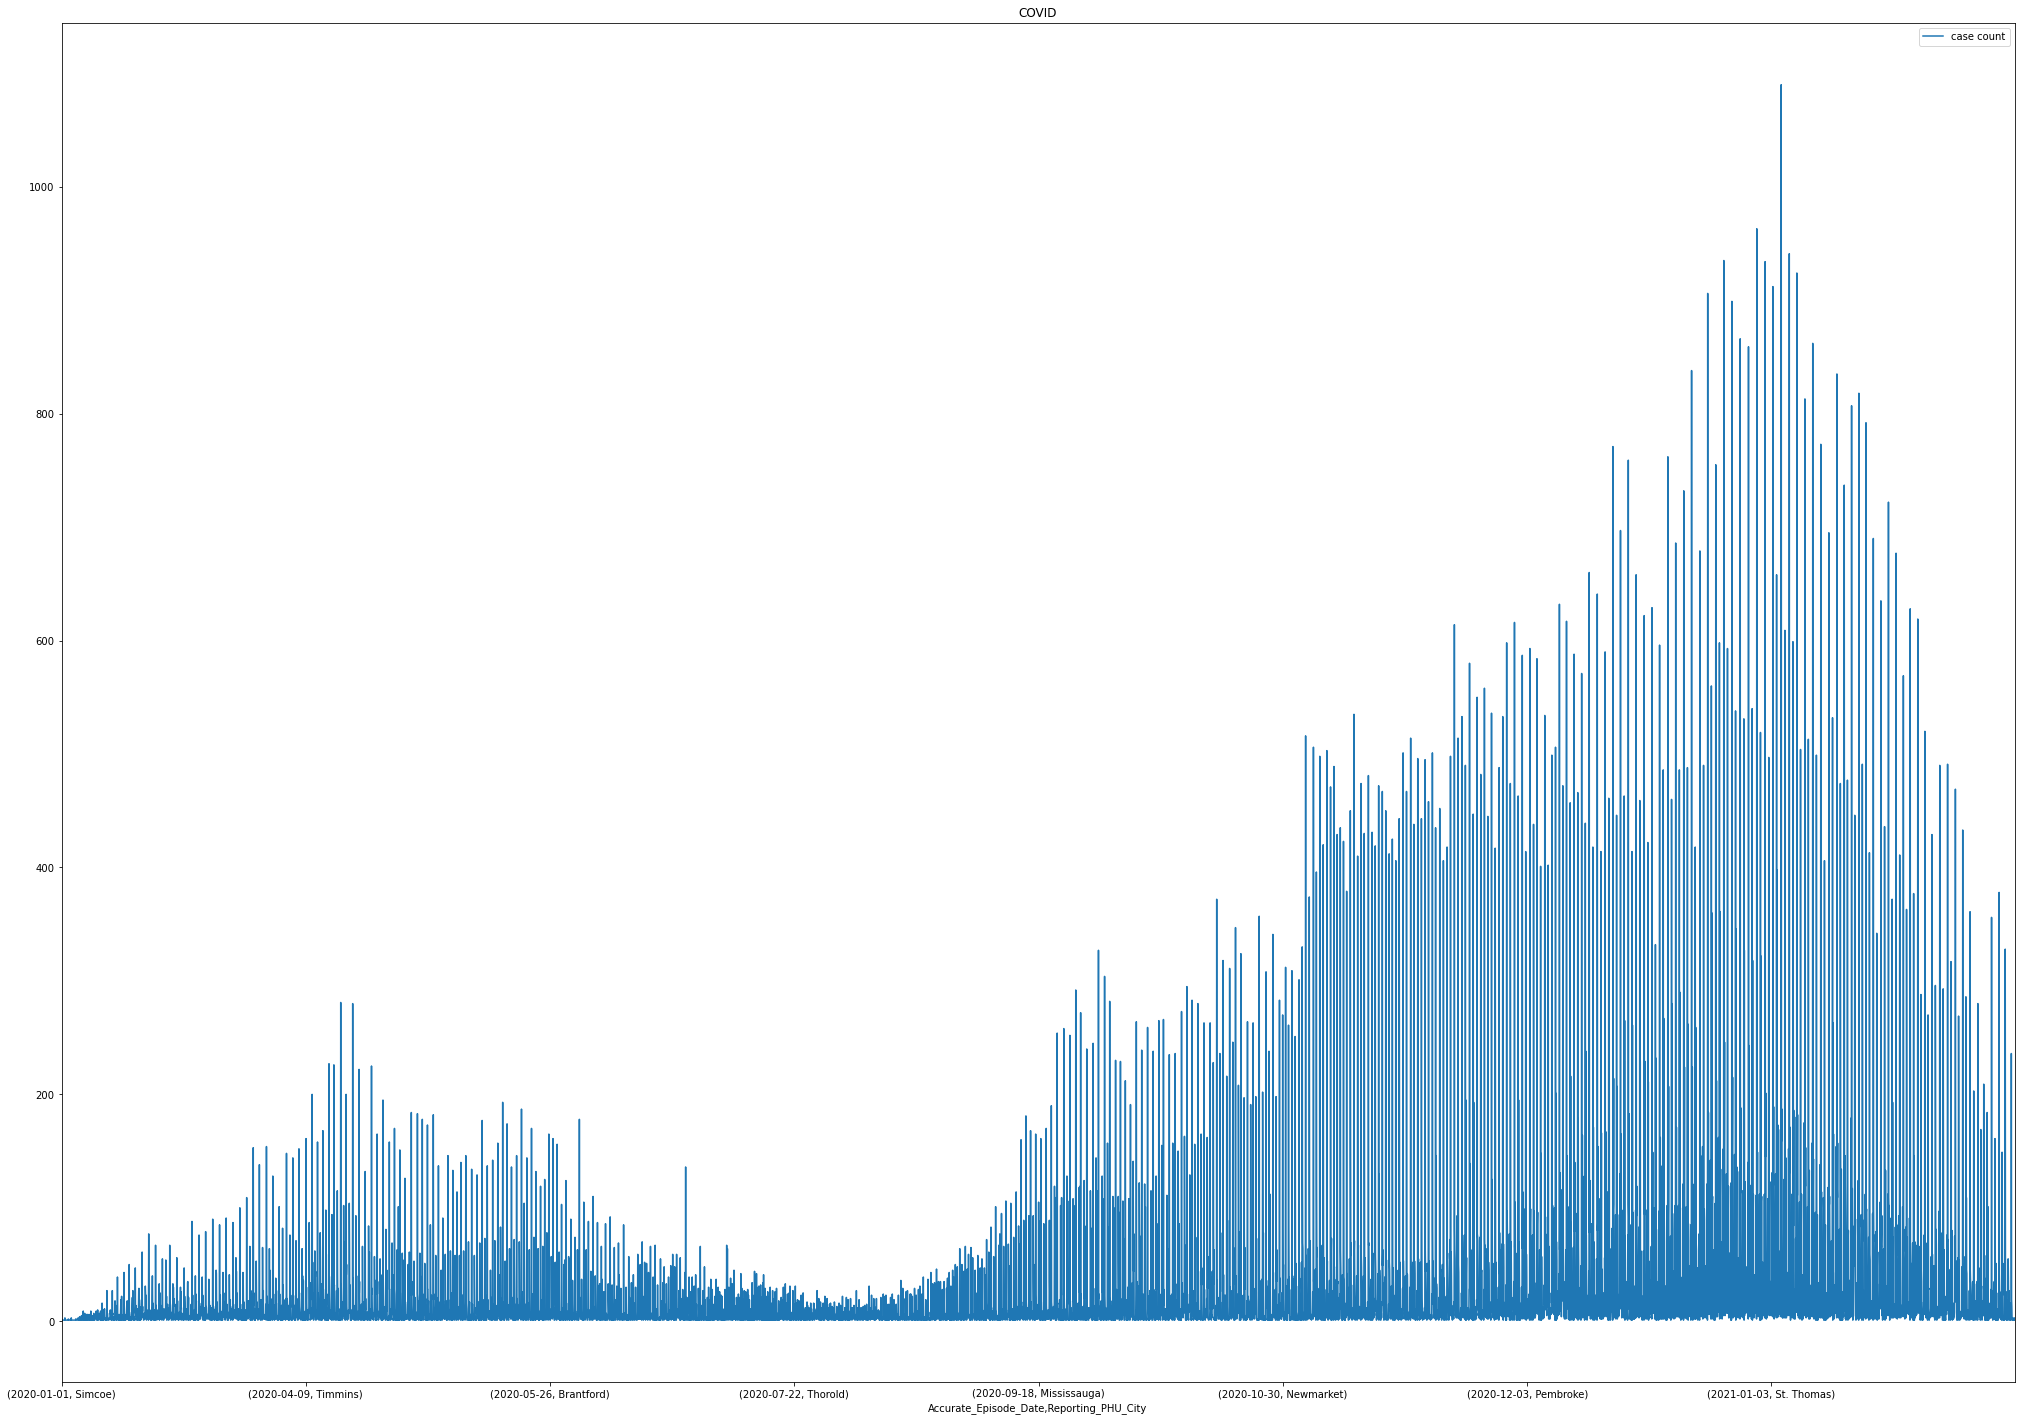

In [30]:
covid_city_pivot.plot(kind="line",title="COVID",figsize=(35,25)).margins(x=0)

In [31]:
covid_city_pivot = pd.pivot_table(covid_df_sum_by_date_by_city, 
                       values='case count', 
                       index=['Accurate_Episode_Date' ],
                        columns=['Reporting_PHU_City' ],
                        dropna = True,
                       aggfunc=np.sum)
covid_city_pivot

Reporting_PHU_City     Barrie  Belleville  Brantford  Brockville  Chatham  \
Accurate_Episode_Date                                                       
2020-01-01                NaN         NaN        NaN         NaN      NaN   
2020-01-02                NaN         NaN        NaN         NaN      NaN   
2020-01-03                NaN         NaN        NaN         NaN      NaN   
2020-01-05                NaN         NaN        NaN         NaN      NaN   
2020-01-09                NaN         NaN        NaN         NaN      NaN   
...                       ...         ...        ...         ...      ...   
2021-02-01               38.0         1.0        9.0         1.0     17.0   
2021-02-02               20.0         1.0        8.0         2.0     15.0   
2021-02-03               24.0         NaN        3.0         NaN      2.0   
2021-02-04                4.0         NaN        1.0         NaN      NaN   
2021-02-05                1.0         NaN        NaN         NaN      NaN   

Reporting_PHU_City     Cornwall  Guelph  Hamilton  Kenora  Kingston  ...  \
Accurate_Episode_Date                                                ...   
2020-01-01                  NaN     NaN       NaN     NaN       NaN  ...   
2020-01-02                  NaN     NaN       NaN     NaN       NaN  ...   
2020-01-03                  NaN     NaN       NaN     NaN       NaN  ...   
2020-01-05                  NaN     NaN       NaN     NaN       NaN  ...   
2020-01-09                  NaN     NaN       NaN     NaN       NaN  ...   
...                         ...     ...       ...     ...       ...  ...   
2021-02-01                 24.0    11.0      58.0     NaN       1.0  ...   
2021-02-02                  6.0     9.0      35.0     NaN       2.0  ...   
2021-02-03                  4.0    12.0      26.0     1.0       NaN  ...   
2021-02-04                  6.0     4.0      19.0     1.0       1.0  ...   
2021-02-05                  NaN     1.0       NaN     NaN       NaN  ...   

Reporting_PHU_City     St. Thomas  Stratford  Sudbury  Thorold  Thunder Bay  \
Accurate_Episode_Date                                                         
2020-01-01                    NaN        NaN      NaN      NaN          NaN   
2020-01-02                    NaN        NaN      NaN      NaN          NaN   
2020-01-03                    NaN        NaN      NaN      NaN          NaN   
2020-01-05                    NaN        NaN      NaN      NaN          NaN   
2020-01-09                    NaN        NaN      NaN      NaN          NaN   
...                           ...        ...      ...      ...          ...   
2021-02-01                   16.0        4.0      3.0     28.0          8.0   
2021-02-02                    8.0        3.0      1.0     25.0          9.0   
2021-02-03                    4.0        5.0      1.0     28.0          4.0   
2021-02-04                    1.0        1.0      NaN     16.0          1.0   
2021-02-05                    1.0        NaN      NaN      NaN          NaN   

Reporting_PHU_City     Timmins  Toronto  Waterloo  Whitby  Windsor  
Accurate_Episode_Date                                               
2020-01-01                 NaN      NaN       1.0     NaN      1.0  
2020-01-02                 NaN      1.0       NaN     NaN      NaN  
2020-01-03                 NaN      1.0       NaN     NaN      NaN  
2020-01-05                 NaN      1.0       NaN     NaN      NaN  
2020-01-09                 NaN      NaN       NaN     NaN      NaN  
...                        ...      ...       ...     ...      ...  
2021-02-01                 3.0    356.0      37.0    18.0     27.0  
2021-02-02                 3.0    378.0      42.0    26.0     18.0  
2021-02-03                 NaN    328.0      26.0    17.0     26.0  
2021-02-04                 2.0    236.0      19.0    13.0      2.0  
2021-02-05                 1.0      3.0       NaN     1.0      NaN  

[380 rows x 34 columns]

In [32]:
covid_city_pivot.dropna()

Reporting_PHU_City     Barrie  Belleville  Brantford  Brockville  Chatham  \
Accurate_Episode_Date                                                       
2020-12-21               53.0         2.0       16.0         2.0     11.0   
2020-12-25               41.0         1.0       15.0         8.0     11.0   
2020-12-30               60.0         3.0       26.0         5.0     18.0   
2020-12-31               57.0         4.0       31.0         8.0     17.0   
2021-01-01               55.0         4.0       31.0        11.0     24.0   
2021-01-02               56.0         4.0       17.0         6.0     13.0   
2021-01-04               79.0         2.0       23.0         3.0     25.0   

Reporting_PHU_City     Cornwall  Guelph  Hamilton  Kenora  Kingston  ...  \
Accurate_Episode_Date                                                ...   
2020-12-21                 19.0    67.0     137.0     2.0      11.0  ...   
2020-12-25                 24.0    41.0     121.0     2.0       5.0  ...   
2020-12-30                 42.0    54.0     147.0     4.0       5.0  ...   
2020-12-31                 44.0    47.0     115.0     3.0       9.0  ...   
2021-01-01                 54.0    43.0     120.0     2.0       6.0  ...   
2021-01-02                 40.0    59.0     112.0     1.0      10.0  ...   
2021-01-04                 48.0    80.0     130.0     5.0       9.0  ...   

Reporting_PHU_City     St. Thomas  Stratford  Sudbury  Thorold  Thunder Bay  \
Accurate_Episode_Date                                                         
2020-12-21                   29.0       23.0      1.0    102.0         23.0   
2020-12-25                   40.0       12.0      4.0     77.0          3.0   
2020-12-30                   55.0       20.0      6.0    132.0          4.0   
2020-12-31                   48.0       17.0      7.0    140.0          7.0   
2021-01-01                   39.0       15.0      9.0    111.0          4.0   
2021-01-02                   38.0       32.0     10.0    112.0          4.0   
2021-01-04                   37.0       19.0      6.0    169.0         10.0   

Reporting_PHU_City     Timmins  Toronto  Waterloo  Whitby  Windsor  
Accurate_Episode_Date                                               
2020-12-21                 3.0    762.0      81.0   102.0    207.0  
2020-12-25                 1.0    679.0      79.0   105.0    146.0  
2020-12-30                 2.0    866.0     113.0   120.0    188.0  
2020-12-31                 2.0    859.0     153.0   147.0    243.0  
2021-01-01                 2.0    963.0     113.0   115.0    149.0  
2021-01-02                 3.0    934.0     154.0   145.0    201.0  
2021-01-04                 4.0   1090.0     162.0   159.0    187.0  

[7 rows x 34 columns]

<AxesSubplot:xlabel='Accurate_Episode_Date'>

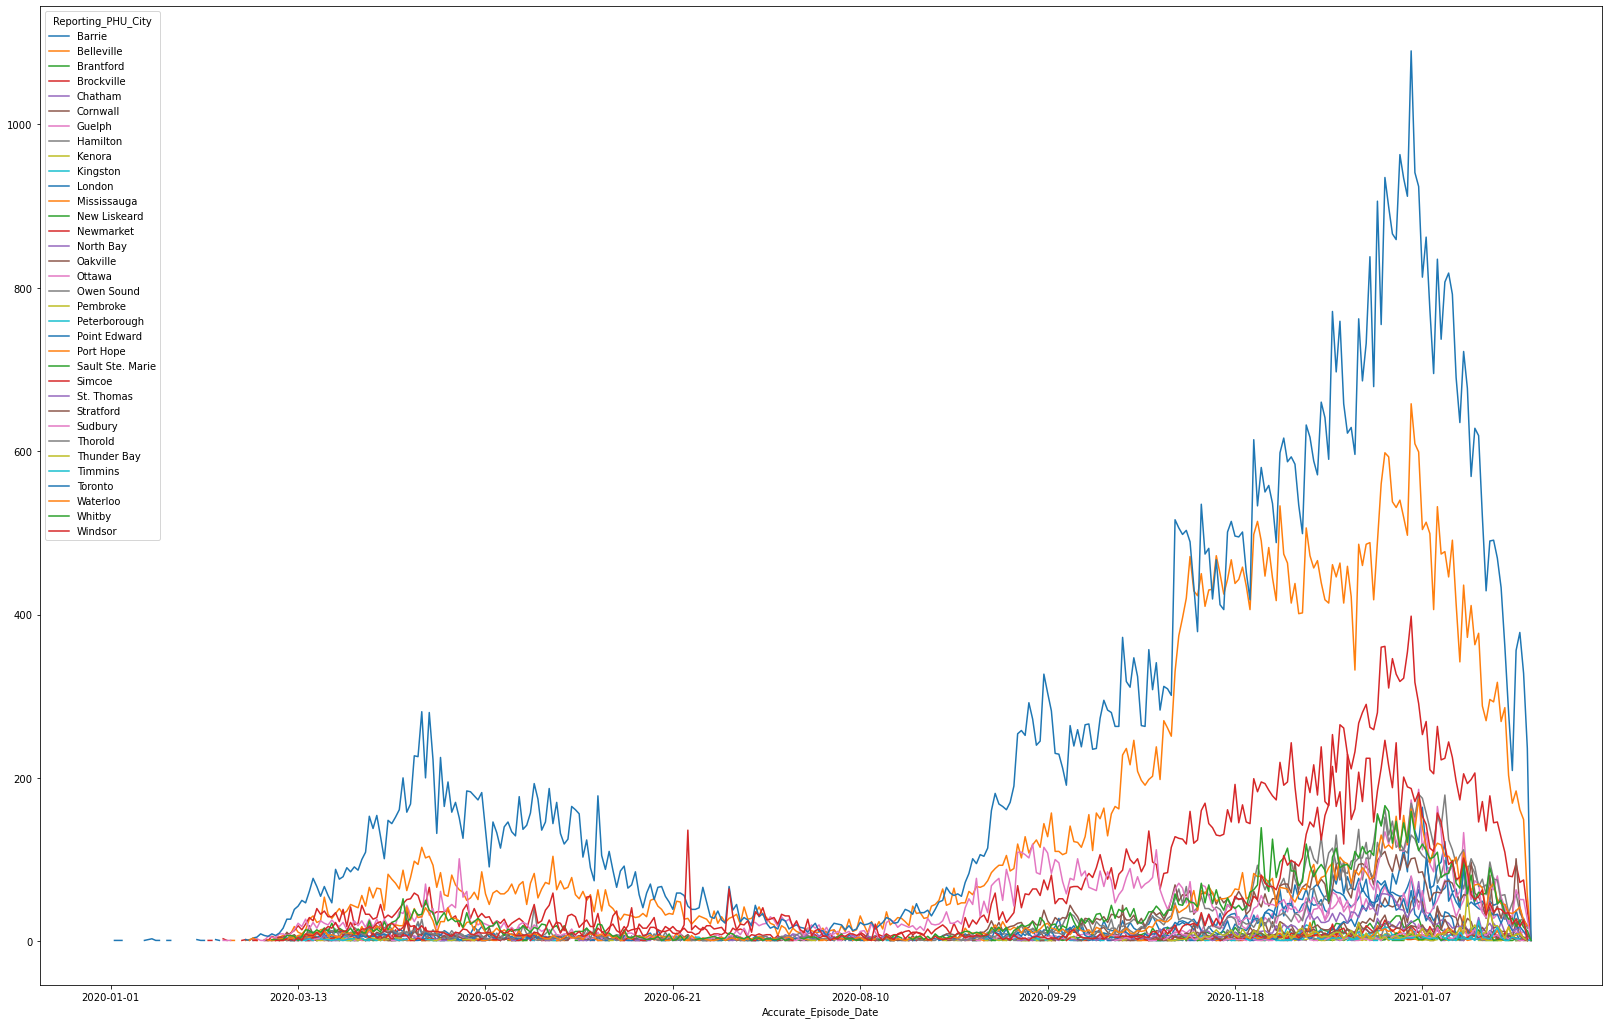

In [33]:
covid_city_pivot.plot(figsize = (28, 18))

In [47]:
# select cities
# Filter the dataframe to only contain results in 7 GTA Cities, Accurate Episode Date, Reporting_PHU, Reporting_PHU_Latitude, Reporting_PHU_Longitude
cities_to_drop = ['Barrie',
                  'Belleville',
                  'Brantford',
                  'Brockville',
                  'Chatham',
                  'Cornwall',
                  'Kenora',
                  'Kingston',
                  'London',
                  'New Liskeard',
                  'Newmarket',
                  'North Bay',
                  'Ottawa',
                  'Owen Sound',
                  'Pembroke',
                  'Peterborough',
                  'Point Edward',
                  'Port Hope',
                  'Sault Ste. Marie',
                  'Simcoe',
                  'St. Thomas',
                  'Stratford',
                  'Sudbury',
                  'Thorold',
                  'Thunder Bay',
                  'Timmins',
                  'Whitby',
                  'Windsor']
cities_to_drop

['Barrie',
 'Belleville',
 'Brantford',
 'Brockville',
 'Chatham',
 'Cornwall',
 'Kenora',
 'Kingston',
 'London',
 'New Liskeard',
 'Newmarket',
 'North Bay',
 'Ottawa',
 'Owen Sound',
 'Pembroke',
 'Peterborough',
 'Point Edward',
 'Port Hope',
 'Sault Ste. Marie',
 'Simcoe',
 'St. Thomas',
 'Stratford',
 'Sudbury',
 'Thorold',
 'Thunder Bay',
 'Timmins',
 'Whitby',
 'Windsor']

In [48]:
covid_cities = toronto + Mississauga + Waterloo + Guelph + Hamilton + Oakville
covid_cities.head()

Row_ID                                                             27266618177
Accurate_Episode_Date        2020-04-102020-04-282020-03-242020-04-022020-0...
Case_Reported_Date           2020-04-172020-05-032020-03-252020-04-062020-0...
Reporting_PHU_City           TorontoTorontoTorontoTorontoTorontoTorontoToro...
Reporting_PHU_Postal_Code    M5B 1W2M5B 1W2M5B 1W2M5B 1W2M5B 1W2M5B 1W2M5B ...
dtype: object

In [49]:
cities_df = pd.DataFrame(covid_city_pivot)
cities_df

Reporting_PHU_City     Barrie  Belleville  Brantford  Brockville  Chatham  \
Accurate_Episode_Date                                                       
2020-01-01                NaN         NaN        NaN         NaN      NaN   
2020-01-02                NaN         NaN        NaN         NaN      NaN   
2020-01-03                NaN         NaN        NaN         NaN      NaN   
2020-01-05                NaN         NaN        NaN         NaN      NaN   
2020-01-09                NaN         NaN        NaN         NaN      NaN   
...                       ...         ...        ...         ...      ...   
2021-02-01               38.0         1.0        9.0         1.0     17.0   
2021-02-02               20.0         1.0        8.0         2.0     15.0   
2021-02-03               24.0         NaN        3.0         NaN      2.0   
2021-02-04                4.0         NaN        1.0         NaN      NaN   
2021-02-05                1.0         NaN        NaN         NaN      NaN   

Reporting_PHU_City     Cornwall  Guelph  Hamilton  Kenora  Kingston  ...  \
Accurate_Episode_Date                                                ...   
2020-01-01                  NaN     NaN       NaN     NaN       NaN  ...   
2020-01-02                  NaN     NaN       NaN     NaN       NaN  ...   
2020-01-03                  NaN     NaN       NaN     NaN       NaN  ...   
2020-01-05                  NaN     NaN       NaN     NaN       NaN  ...   
2020-01-09                  NaN     NaN       NaN     NaN       NaN  ...   
...                         ...     ...       ...     ...       ...  ...   
2021-02-01                 24.0    11.0      58.0     NaN       1.0  ...   
2021-02-02                  6.0     9.0      35.0     NaN       2.0  ...   
2021-02-03                  4.0    12.0      26.0     1.0       NaN  ...   
2021-02-04                  6.0     4.0      19.0     1.0       1.0  ...   
2021-02-05                  NaN     1.0       NaN     NaN       NaN  ...   

Reporting_PHU_City     St. Thomas  Stratford  Sudbury  Thorold  Thunder Bay  \
Accurate_Episode_Date                                                         
2020-01-01                    NaN        NaN      NaN      NaN          NaN   
2020-01-02                    NaN        NaN      NaN      NaN          NaN   
2020-01-03                    NaN        NaN      NaN      NaN          NaN   
2020-01-05                    NaN        NaN      NaN      NaN          NaN   
2020-01-09                    NaN        NaN      NaN      NaN          NaN   
...                           ...        ...      ...      ...          ...   
2021-02-01                   16.0        4.0      3.0     28.0          8.0   
2021-02-02                    8.0        3.0      1.0     25.0          9.0   
2021-02-03                    4.0        5.0      1.0     28.0          4.0   
2021-02-04                    1.0        1.0      NaN     16.0          1.0   
2021-02-05                    1.0        NaN      NaN      NaN          NaN   

Reporting_PHU_City     Timmins  Toronto  Waterloo  Whitby  Windsor  
Accurate_Episode_Date                                               
2020-01-01                 NaN      NaN       1.0     NaN      1.0  
2020-01-02                 NaN      1.0       NaN     NaN      NaN  
2020-01-03                 NaN      1.0       NaN     NaN      NaN  
2020-01-05                 NaN      1.0       NaN     NaN      NaN  
2020-01-09                 NaN      NaN       NaN     NaN      NaN  
...                        ...      ...       ...     ...      ...  
2021-02-01                 3.0    356.0      37.0    18.0     27.0  
2021-02-02                 3.0    378.0      42.0    26.0     18.0  
2021-02-03                 NaN    328.0      26.0    17.0     26.0  
2021-02-04                 2.0    236.0      19.0    13.0      2.0  
2021-02-05                 1.0      3.0       NaN     1.0      NaN  

[380 rows x 34 columns]

In [50]:
cities_df.dropna()

Reporting_PHU_City     Barrie  Belleville  Brantford  Brockville  Chatham  \
Accurate_Episode_Date                                                       
2020-12-21               53.0         2.0       16.0         2.0     11.0   
2020-12-25               41.0         1.0       15.0         8.0     11.0   
2020-12-30               60.0         3.0       26.0         5.0     18.0   
2020-12-31               57.0         4.0       31.0         8.0     17.0   
2021-01-01               55.0         4.0       31.0        11.0     24.0   
2021-01-02               56.0         4.0       17.0         6.0     13.0   
2021-01-04               79.0         2.0       23.0         3.0     25.0   

Reporting_PHU_City     Cornwall  Guelph  Hamilton  Kenora  Kingston  ...  \
Accurate_Episode_Date                                                ...   
2020-12-21                 19.0    67.0     137.0     2.0      11.0  ...   
2020-12-25                 24.0    41.0     121.0     2.0       5.0  ...   
2020-12-30                 42.0    54.0     147.0     4.0       5.0  ...   
2020-12-31                 44.0    47.0     115.0     3.0       9.0  ...   
2021-01-01                 54.0    43.0     120.0     2.0       6.0  ...   
2021-01-02                 40.0    59.0     112.0     1.0      10.0  ...   
2021-01-04                 48.0    80.0     130.0     5.0       9.0  ...   

Reporting_PHU_City     St. Thomas  Stratford  Sudbury  Thorold  Thunder Bay  \
Accurate_Episode_Date                                                         
2020-12-21                   29.0       23.0      1.0    102.0         23.0   
2020-12-25                   40.0       12.0      4.0     77.0          3.0   
2020-12-30                   55.0       20.0      6.0    132.0          4.0   
2020-12-31                   48.0       17.0      7.0    140.0          7.0   
2021-01-01                   39.0       15.0      9.0    111.0          4.0   
2021-01-02                   38.0       32.0     10.0    112.0          4.0   
2021-01-04                   37.0       19.0      6.0    169.0         10.0   

Reporting_PHU_City     Timmins  Toronto  Waterloo  Whitby  Windsor  
Accurate_Episode_Date                                               
2020-12-21                 3.0    762.0      81.0   102.0    207.0  
2020-12-25                 1.0    679.0      79.0   105.0    146.0  
2020-12-30                 2.0    866.0     113.0   120.0    188.0  
2020-12-31                 2.0    859.0     153.0   147.0    243.0  
2021-01-01                 2.0    963.0     113.0   115.0    149.0  
2021-01-02                 3.0    934.0     154.0   145.0    201.0  
2021-01-04                 4.0   1090.0     162.0   159.0    187.0  

[7 rows x 34 columns]

In [51]:
cities_df.drop(cities_to_drop, inplace=True, axis=1)
cities_df

Reporting_PHU_City     Guelph  Hamilton  Mississauga  Oakville  Toronto  \
Accurate_Episode_Date                                                     
2020-01-01                NaN       NaN          NaN       NaN      NaN   
2020-01-02                NaN       NaN          NaN       NaN      1.0   
2020-01-03                NaN       NaN          NaN       NaN      1.0   
2020-01-05                NaN       NaN          NaN       NaN      1.0   
2020-01-09                NaN       NaN          NaN       NaN      NaN   
...                       ...       ...          ...       ...      ...   
2021-02-01               11.0      58.0        184.0     101.0    356.0   
2021-02-02                9.0      35.0        161.0      41.0    378.0   
2021-02-03               12.0      26.0        149.0      23.0    328.0   
2021-02-04                4.0      19.0         55.0       8.0    236.0   
2021-02-05                1.0       NaN          3.0       1.0      3.0   

Reporting_PHU_City     Waterloo  
Accurate_Episode_Date            
2020-01-01                  1.0  
2020-01-02                  NaN  
2020-01-03                  NaN  
2020-01-05                  NaN  
2020-01-09                  NaN  
...                         ...  
2021-02-01                 37.0  
2021-02-02                 42.0  
2021-02-03                 26.0  
2021-02-04                 19.0  
2021-02-05                  NaN  

[380 rows x 6 columns]

<AxesSubplot:xlabel='Accurate_Episode_Date'>

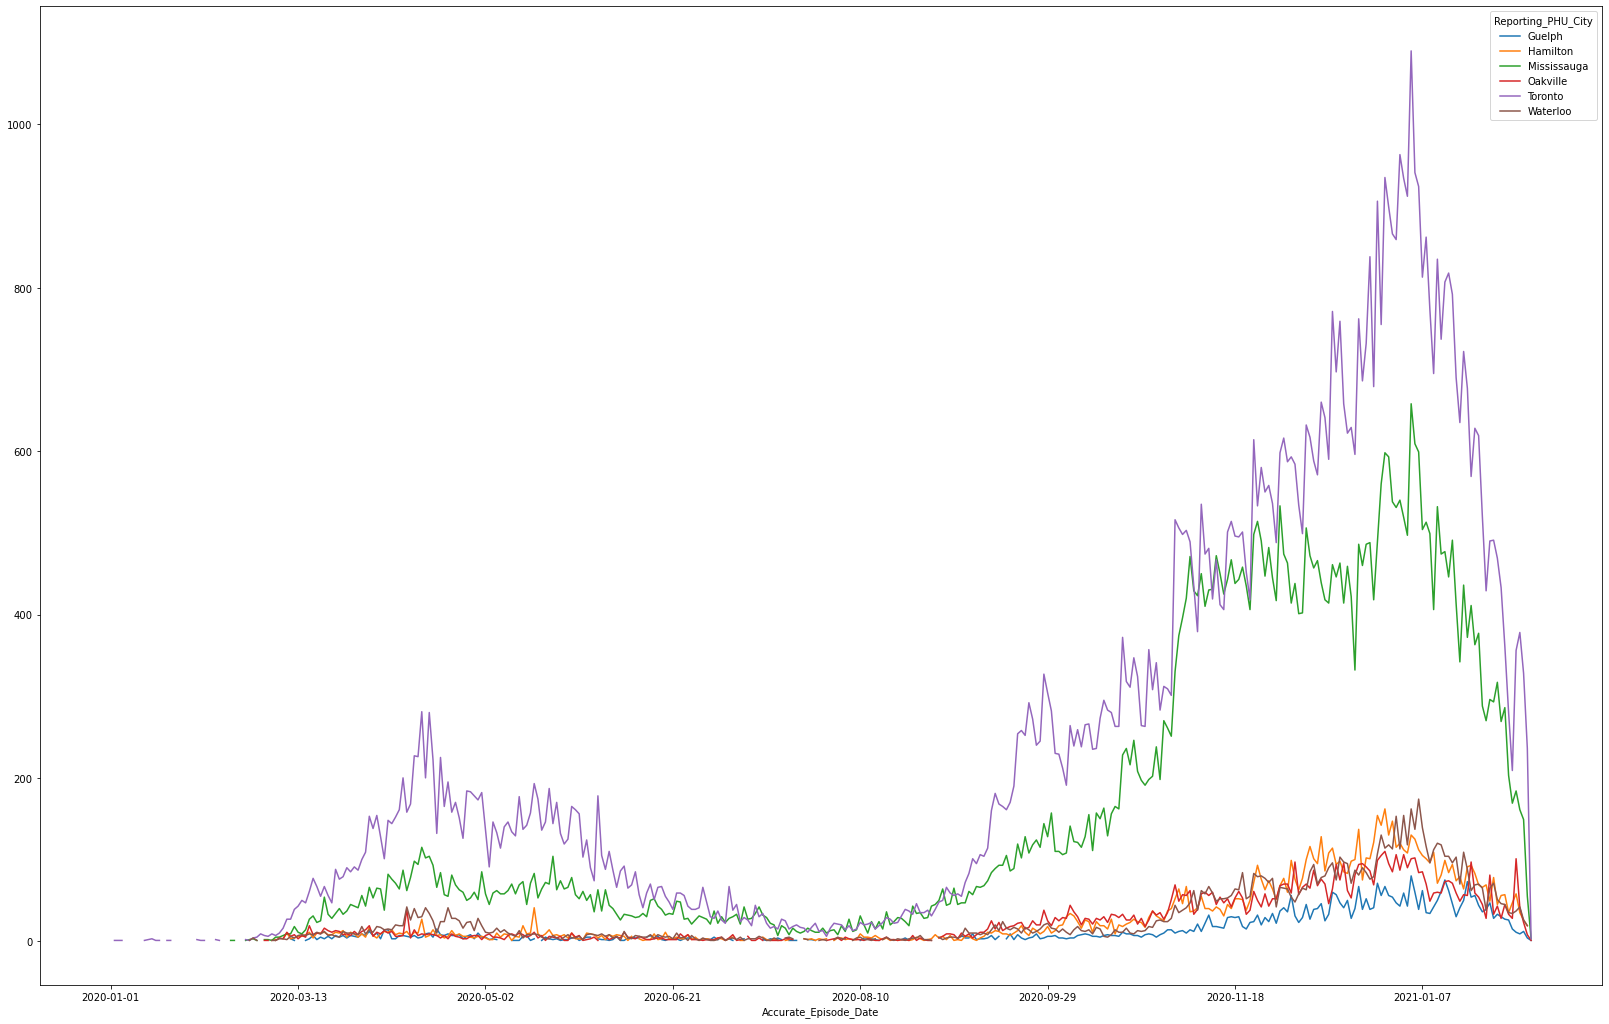

In [52]:
cities_df.plot(figsize = (28, 18))

In [45]:
#Initial Imports
import geopandas as gpd
import json
import pandas as pd
import numpy as np
import math
import time
import pprint
from datetime import date, datetime, timedelta

#Import Map Tools
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, NumeralTickFormatter, Label
from bokeh.palettes import brewer
from bokeh.io.doc import curdoc
from bokeh.models import Slider, HoverTool, Select, Button, Text
from bokeh.layouts import widgetbox, row, column

In [39]:
#SHAPEFILE --> https://www.arcgis.com/home/item.html?id=dcbcdf86939548af81efbd2d732336db
shapefile = 'data/1m_admin_canada/Canada.shp'
sf = gpd.read_file(shapefile)[['NAME', 'geometry']]
sf.columns = ['province', 'geometry'] 
sf.loc[sf['province'] == 'Yukon Territory', 'province'] = 'Yukon' #Replace Yukon Territory by Yukon 

DriverError: data/1m_admin_canada/Canada.shp: No such file or directory

In [ ]:
map_df = px.data.gapminder()
fig = px.bar(covid_city_pivot, y='case count', color='continent', labels={'case count':'Reporting_PHU_City'},
             hover_data=['Reporting_PHU_City'],
             title='Covid by City')
fig.show()

In [41]:
covid_df.hvplot.bar(title="Composite benchmark Prices Over The Past 5 Years", figsize=(25,15),fontscale=0.5,xlabel="Year",ylabel="Population",x="Accurate_Episode_Date",y=["Reporting_PHU_City"])

TypeError: '<=' not supported between instances of 'int' and 'str'

:Bars   [Accurate_Episode_Date,Variable]   (value)

In [ ]:
#Plot city series by date
city_line = px.line(data_frame=covid_df,
    x='Accurate_Episode_Date',
    y=To',
    title='Cities by Date',
    width=None,
    height=None,
)

In [ ]:
# cases by city
covid_df.loc[covid_df['Reporting_PHU_City'] == [cities]

In [ ]:
# select cities
# Filter the dataframe to only contain results in 7 GTA Cities, Accurate Episode Date, Reporting_PHU, Reporting_PHU_Latitude, Reporting_PHU_Longitude
covid_city_pivot.drop(cities_to_drop, inplace=True, axis=1)

In [ ]:
df_ca.index = df_ca['Province/State']
df_ca = df_ca.drop(['Diamond Princess','Grand Princess','Repatriated Travellers'],axis=0)
ax = df_ca.transpose().iloc[4:].plot(figsize=(14, 7),
                                     title = 'Cumulative cases of COVID-19 in provinces of Canada')
ax.set_xlabel("Date")
ax.set_ylabel("Number of cases")